In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import warnings
import pandas_datareader as pdr
key="ae0db843ff77782112d497f26f01281d114c67ce"

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-04-03 00:00:00+00:00,143.70,144.12,143.05,143.71,19985714,33.913750,34.012871,33.760347,33.916110,79942856,0.0,1.0
1,AAPL,2017-04-04 00:00:00+00:00,144.77,144.89,143.17,143.25,19891354,34.166274,34.194594,33.788668,33.807548,79565416,0.0,1.0
2,AAPL,2017-04-05 00:00:00+00:00,144.02,145.46,143.81,144.22,27717854,33.989271,34.329117,33.939710,34.036472,110871416,0.0,1.0
3,AAPL,2017-04-06 00:00:00+00:00,143.66,144.52,143.45,144.29,21149034,33.904310,34.107273,33.854749,34.052992,84596136,0.0,1.0
4,AAPL,2017-04-07 00:00:00+00:00,143.34,144.18,143.27,143.73,16658543,33.828788,34.027032,33.812268,33.920830,66634172,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2022-03-24 00:00:00+00:00,174.07,174.14,170.21,171.06,90131418,174.070000,174.140000,170.210000,171.060000,90131418,0.0,1.0
1254,AAPL,2022-03-25 00:00:00+00:00,174.72,175.28,172.75,173.88,80281664,174.720000,175.280000,172.750000,173.880000,80281664,0.0,1.0
1255,AAPL,2022-03-28 00:00:00+00:00,175.60,175.73,172.00,172.17,90371916,175.600000,175.730000,172.000000,172.170000,90371916,0.0,1.0
1256,AAPL,2022-03-29 00:00:00+00:00,178.96,179.01,176.34,176.69,100589440,178.960000,179.010000,176.340000,176.690000,100589440,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       143.70
1       144.77
2       144.02
3       143.66
4       143.34
         ...  
1253    174.07
1254    174.72
1255    175.60
1256    178.96
1257    177.77
Name: close, Length: 1258, dtype: float64

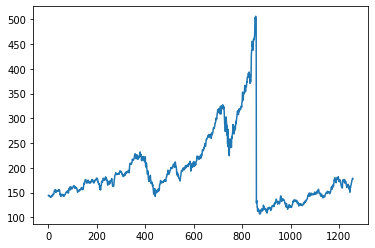

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np

In [13]:
df1


0       143.70
1       144.77
2       144.02
3       143.66
4       143.34
         ...  
1253    174.07
1254    174.72
1255    175.60
1256    178.96
1257    177.77
Name: close, Length: 1258, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.09232311]
 [0.09500313]
 [0.09312461]
 ...
 [0.17222292]
 [0.1806387 ]
 [0.17765811]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 441)

In [18]:
train_data

array([[0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.0994114 ],
       [0.10549781],
       [0.11564183],
       [0.11809643],
       [0.116268  ],
       [0.11799624],
       [0.12338134],
       [0.12237946],
       [0.12180338],
       [0.10872887],
       [0.11446462],
       [0.11576706],
       [0.11809643],
       [0.11762054],
       [0.11646838],
       [0.11779587],
       [0.11714465],
       [0.11729493],
       [0.11501565],
       [0.11606763],
       [0.12175329],
       [0.11794615],
       [0.11924859],
       [0.12155291],
       [0.12060113],
       [0.105

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 343ms/step - loss: 0.0214 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 3/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0025 - val_loss: 6.2629e-04
Epoch 4/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0012 - val_loss: 2.8116e-04
Epoch 5/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0011 - val_loss: 2.5411e-04
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0010 - val_loss: 3.4703e-04
Epoch 7/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0010 - val_loss: 3.2115e-04
Epoch 8/100
12/12 [==============================] - 2s 200ms/step - loss: 9.6927e-04 - val_loss: 3.0824e-04
Epoch 9/100
12/12 [==============================] - 2s 205ms/step - loss: 8.4879e-04 - val_loss: 2.3534e-04
Epoch 10/100
12/12 [==============================] - 

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### PLOTTING 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)
plt.title('Final graph')